In [1]:
%load_ext lab_black

In [ ]:
!conda install -c conda-forge ipynb-py-convert -y

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn")

In [34]:
df_finances = pd.read_csv(
    "../data/processed/financial_data_with_survival_info.csv", index_col=0
)

In [35]:
# select columns for analysis

columns = df_finances.columns
keywords = [
    "Research",
    "Marketing",
    "Advertising",
    "Dividend",
    "Earnings",
    "Stores",
    "Revenue",
    "Income",
    "Number",
    "Assets",
    "Cash",
    "Taxes",
    "Float",
    "Outstanding",
    "Shares",
    "Inventories",
    "Debt",
]

select_columns = []
for keyw in keywords:
    for col in columns:
        if keyw.lower() in col.lower():
            select_columns.append(col)

# manually select columns
features = [
    "Research & Development",
    "Dividends Paid",
    "Retained Earnings",
    "Revenue",
    "Cost of Revenue",
    "Operating Income (Loss)",
    "Non-Operating Income (Loss)",
    "Pretax Income (Loss), Adj.",
    "Pretax Income (Loss)",
    "Income Tax (Expense) Benefit, Net",
    "Income (Loss) from Continuing Operations",
    "Net Income",
    "Total Current Assets",
    "Other Long Term Assets",
    "Total Noncurrent Assets",
    "Total Assets",
    "Cash, Cash Equivalents & Short Term Investments",
    "Net Cash from Operating Activities",
    "Net Cash from Acquisitions & Divestitures",
    "Net Cash from Investing Activities",
    "Cash from (Repayment of) Debt",
    "Cash from (Repurchase of) Equity",
    "Net Cash from Financing Activities",
    "Shares (Basic)",
    "Shares (Diluted)",
    "Inventories",
    "Short Term Debt",
    "Long Term Debt",
    "survived",
]

index_columns = ["Ticker", "Fiscal Year"]

select_columns = index_columns + features

In [36]:
df_finances = df_finances[select_columns]
df_finances.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 302 to 19592
Data columns (total 31 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Ticker                                           891 non-null    object 
 1   Fiscal Year                                      891 non-null    int64  
 2   Research & Development                           316 non-null    float64
 3   Dividends Paid                                   426 non-null    float64
 4   Retained Earnings                                874 non-null    float64
 5   Revenue                                          891 non-null    float64
 6   Cost of Revenue                                  862 non-null    float64
 7   Operating Income (Loss)                          891 non-null    int64  
 8   Non-Operating Income (Loss)                      891 non-null    float64
 9   Pretax Income (Loss), Adj.  

In [44]:
# normalize
col_numeric = df_finances.columns[2:-1]
df_finances[col_numeric] /= df_finances.l[col_numeric]

<AxesSubplot:xlabel='Fiscal Year', ylabel='Cash, Cash Equivalents & Short Term Investments'>

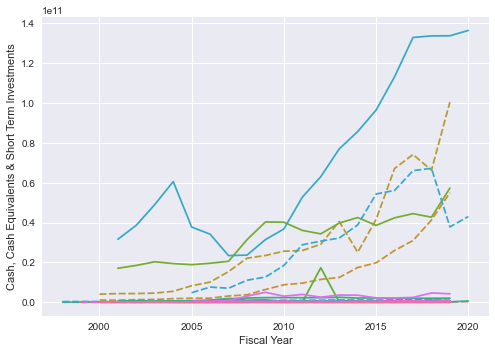

In [50]:
sns.lineplot(
    data=df_finances,
    x="Fiscal Year",
    y="Cash, Cash Equivalents & Short Term Investments",
    hue="Ticker",
    style="survived",
    legend=False,
)